## 3. Sistemas lineares e escalonamento

A resolução de sistema lineares é provavelmente o processo numérico mais utilizado para simular situações do mundo real. É uma etapa fundamental na busca de soluções de problemas que envolvam, por exemplo, equações diferenciais parciais, otimização, regressão linear e não linear e conjuntos de equações não lineares. Geralmente, é a fase que demanda a maior parte do tempo de processamento para resolver o problema. Portanto, é de extrema importância que se tenha uma implementação eficiente do método. 

Nas seções seguintes, serão abordados os principais métodos diretos e alguns métodos iterativos usados na para a resolução de sistemas de equaçãoes algébricas lineares (ou simplesmente, sistemas lineares).

Considere a forma geral de um sistema linear de $n$ equações e $n$ incógnias

$$ \begin{cases} 
	         a_{11}x_1 +a_{12}x_2 + \cdots + a_{1n}x_n = b_1\\ 
	         a_{21}x_1 +a_{22}x_2 + \cdots + a_{2n}x_n = b_2\\
	         \vdots   \\
	         a_{n1}x_1 +a_{n2}x_2 + \cdots + a_{nn}x_n = b_n\\
             \end{cases} $$

O qual pode ser escrito em notação compacta, na seguinte forma

$$  \sum_{j=1}^{n} a_{ij} x_j = b_i, \quad i=1,2,...,n$$

com $a_{ij}$ e $b_i$ sendo coeficientes reais conhecidos e $x_i$ as incógnitas. 

Este mesmo sistema pode também ser escrito na forma de uma equação matricial 

$$Ax=b$$

em que $A= [a_{ij}]$ com $i,j=1,..,n$, é a matriz dos coeficientes, 
$x=[x_1,x_2,...,x_n]^t$ é o vetor de incógintas e $b=[b_1, b_2,...,b_n]^t$ é o vetor de termos independentes de  $x$. Então, tem-se

$$\left[\begin{array}{cccc} 
	         a_{11} & a_{12} & \cdots & a_{1n} \\ 
	         a_{21} & a_{22} & \cdots & a_{2n} \\
	         \vdots & \vdots & \vdots & \vdots \\
	         a_{n1} & a_{n2} & \cdots & a_{nn} \\
	         \end{array} \right]
\left[\begin{array}{c} 
	         x_1 \\ 
	         x_2 \\
             \vdots\\
	         x_n \\
	         \end{array} \right]
=
\left[\begin{array}{c} 
	         b_1 \\ 
	         b_2 \\
             \vdots\\
	         b_n \\
	         \end{array} \right]
	         $$

Resolver o sistema dado, consiste em encontrar o vetor solução $\overline x=[\overline x_1, \overline x_2,..., \overline x_n]^t$ que satisfaça todas as equações simultaneamente. Uma condição suficiente para que este sistema possua solução única é que $det(A) \neq 0$.

**Interpretação gráfica**

No caso de um sistema $2 \times 2$, graficamente, em $R^2$, a solução representa a intersecção das retas definidas pelas equações que compõe o sistema. Vejamos os exemplos a seguir.

**Exemplo 3.1:**
O sistema linear 

$$ \begin{cases} 
	         -x_1 + 2x_2 = 3\\ 
              x_1 + x_2 = 3
             \end{cases} $$
             
tem uma única solução $\overline x= (1,2)^t$, como pode ser visto no gráfico abaixo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(3,2)

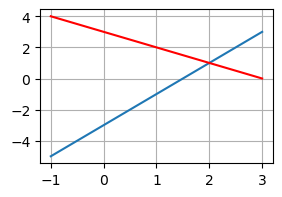

In [2]:
x = np.linspace(-1,3,2)
plt.plot(x, -3+2*x, "-")
plt.plot(x, 3-x, "r-") 
plt.grid()
plt.show()

Já o sistema linear 

$$ \begin{cases} 
	         x_1 + x_2 = 1\\ 
             2x_1 + 2x_2 = 2
             \end{cases} $$
             
tem infinitas soluções já que as duas equações representam a retas coincidentes.

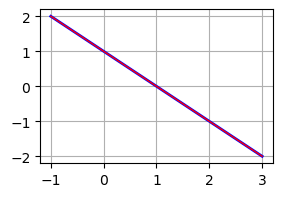

In [3]:
plt.plot(x, 1-x, "b-", linewidth= 2.0)
plt.plot( x, (2-2*x)/2, "r-", linewidth=1.0) 
plt.grid()
plt.show()

Por fim, o sistema linear 

$$ \begin{cases} 
	         x_1 + x_2 = 1\\ 
             2x_1 + 2x_2 = 4
             \end{cases} $$
             
Não tem nenhuma solução (sistema inconsistente) já que as duas equações representam a retas paralelas.

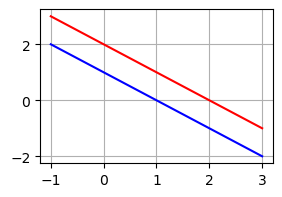

In [4]:
plt.plot(x, 1-x, "b-")
plt.plot(x, (4-2*x)/2, "r-") 
plt.grid()
plt.show()

Para sistema com três incógnitas, as equações envolvidas são geometricamente interpretadas como planos em $\mathbb R^3$. A figura abaixo mostra quatro possibilidades de posições relativas entre três planos distintos. 

<img src="https://github.com/tiagoburiol/MatComp_II/blob/main/imagens/planos_interc.png?raw=true" width="960">

**Atividade 3.1:**

Plote os gráficos dos sistemas abaixo e escreva o número de soluções de cada um. 

(a) $\begin{cases} 
2x + \frac 32 y = 2\\
-4x -3y = 3
\end{cases}$ 

(b) $\begin{cases} 
2x + \frac 32 y = 2\\
3x -5y = 2
\end{cases}. $

(c) $\begin{cases} 
3x + \frac 32 y = 2\\
-x -\frac 12 y = -\frac23
\end{cases}. $

(d) $\begin{cases} 
-2x + y = 2\\
\frac12x - y = -1\\
-x + 2y = 10 
\end{cases}. $

**Condicionamento de matrizes**

Sabemos que um sistema linear $n \times n$, $Ax=b$ tem solução única se $det(A) \neq 0$, caso $det(A)=0$ dizemos que a matriz $A$ é singular e o sistema poderá ter infinitas soluções ou nenhuma solução. Mas o que acontece se a matriz é "quase singular" ($det(A)$ é muito pequeno)?

Dizemos que $det(A)=|A|$ é muito pequeno se $|A|<<||A||$ onde $||A||$ é a **norma** da matriz $A$. A norma é um número real usado para expressar a magnitude de um vetor ou de uma matriz (Ver [Arenalles, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/68) ou [Bourden,2010](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/496)).

**Norma de vetores**

No caso de um vetor $x$ de tamanho $n$, as normas são definidas em termos da _norma−p_

$$ \|x\|_p = \left( \sum^n_{i=1} \left|x_i \right|^p \right)^{1/p}, \,\,\, 1\leq p < \infty$$

A partir dessa equação, definimos três normas vetoriais importantes, a **norma soma de magnitudes**, definida como 

$$\|x\|_1 =  \sum^n_{i=1} \left|x_i \right| $$

A **norma Euclidiana**, com a forma

$$\|x\|_2 =  \sqrt{\sum^n_{i=1} \left|x_i \right|^2}  $$

E a **norma de máxima magnitude**, como segue

$$\|x\|_\infty = \lim_{p \to \infty} \left( \sum^n_{i=1} \left|x_i \right|^p \right)^{1/p}= \max_{1 \leq i\leq n} \left|x_i \right|$$


**Norma de matrizes**
Normas de matrizes podem ser definidas forma semelhante. Chamamos de **norma Euclidiana** ao valor dado por
$$ \|A\|_e = \sqrt{\sum^n_{i=1} \sum^n_{j=1} A_{ij}^2}$$

e **norma linha** ou **norma infinito** ao valor dado por
$$\|A\|_{\infty} = \max_{1 \leq i \leq n} \sum_{j=1}^n \left|A_{ij} \right| $$


**Número de condicionamento de uma matriz**
Uma medida formal para o condicionamento de uma matriz, o **número de condicionamento da matriz** definido como 

$$cond(A) = \|A\| \|A^{-1}\| $$

se esse número estiver próximo de 1, então a matriz é bem condicionada. Esse número aumenta com o mal condicionamento da matriz. 

Infelizmente, o número de condicionamento é computacionalmente oneroso para matrizes grandes. Então, muitas vezes é suficiente estimar o condicionamento comparando o determinante com a magnitude dos elementos da matriz. 

Se as equações estiverem mal condicionadas, pequenas mudanças nos coeficientes da matriz resultarão em grandes mudanças na solução.

**Exemplo 3.2:**
Consideremos o sistema linear 
$$ \begin{cases} 
	         2x_1 + x_2 = 3\\ 
             2x_1 + 1.001x_2 = 0
             \end{cases} $$
Cuja solução é dada por:

In [11]:
import scipy.linalg as la

A = [[2, 1], [2, 1.001]]
b = [3, 0]
print ('x =', la.solve(A,b))

x = [ 1501.5 -3000. ]


A matriz dos coeficientes desse sistema tem um número de condicionamento grande, ou seja, a matriz é mal condicionada

In [12]:
print (la.norm(A) * la.norm(la.inv(A)))

5001.000500000551


In [13]:
la.norm(A)

3.162594030222659

In [14]:
la.det(A)

0.0019999999999997797

Observe o que acontece com a solução do sistema quando variamos ligeiramente um dos coeficientes 

In [15]:
A = [[2, 1], [2, 1.002]]
print ('x =',la.solve(A,b))

x = [  751.5 -1500. ]


Uma mudança no coeficiente na ordem de 1% gerou uma diferença na solução de 100%!

### Sistemas triangulares e escalonamento de matrizes

Muitas vezes é útil escalonar a matriz ampliada de um sistema linear para obter um sistema triangular equivalente que seja mais fácil de resolver. Sistemas triagulares, em geral podem ser facilmente resolvidos por substituições sucessivas.

Um **sistema triangular inferior** representado por $Lx=b$, possui matriz de coeficientes tal que $[l_{ij}]=0$ para $i<j$, com $i,j=0,1,...,n$. 

Um algoritmo para obter a sua solução é dado por:

$$ x_1 = b_1/a_{11}$$

para $i=2,3...,n$, faça

$$ x_i = \frac{b_i- \sum\limits_{j=1}^{(i-1)} a_{ij}x_j}{a_{ii}}$$	         
	         
Usando Python, um código que implementa esse algoritmo, é mostrado no exemplo abaixo.

**Exemplo 3.3:** 

Seja o sistema linear
$$ \begin{cases} 
	         2x_1 = 2\\ 
             x_1 + 4x_2 = -3\\
             x_1 + x_2 + x_3 = 0
             \end{cases} $$
um código em Python que implementa esse algoritmo e a solução obtida executando o programa são mostrados a seguir 

In [26]:
A = np.array([[2,0,0],
              [1.,4.,0],
              [1.,1.,1.]])

b = np.array([2.,-3., 0])

M = np.hstack((A,b.reshape(3,1)))
M

array([[ 2.,  0.,  0.,  2.],
       [ 1.,  4.,  0., -3.],
       [ 1.,  1.,  1.,  0.]])

In [27]:
x1 = b[0]/A[0][0]
x = [x1]

for i in range(1,len(A)):
    soma = 0
    for j in range(0,i):
        soma +=  A[i][j]*x[j]
    x.append((b[i]-soma)/A[i][i])
print (x)

[1.0, -1.0, 0.0]


In [28]:
A@x

array([ 2., -3.,  0.])

Uma versão mais elegante do algoritmo para resolução de um sistema triangular inferior pode ser escrito como é mostrado abaixo

In [29]:
for i in range(len(b)): 
    b[i] = (b[i] - np.dot(A[i,0:i],b[0:i]))/A[i][i] 
print (b)

[ 1. -1.  0.]


Um **sistema triangular superior** representado por $Ux=b$, possui matriz de coeficientes tal que $[u_{ij}]=0$ para $i>j$, com $i,j=0,1,...,n$. 

Um algoritmo para obter a sua solução é dado por:

$$ x_n = b_n/a_{nn}$$

para $i=(n-1), (n-2),...,1$, faça

$$ x_i = \frac{b_i- \sum\limits_{j=i+1}^{(n)} a_{ij}x_j}{a_{ii}}$$	

Usando Python, um código que implementa esse algoritmo, é mostrado abaixo.

In [30]:
def solve_U(U,b):
    n=len(b)
    x = np.empty(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.sum(U[i,i+1:n+1]*x[i+1:n+1]))/U[i,i]
    return x

**Exemplo 3.4:**
Seja o sistema linear
$$ \begin{cases} 
	         3x_1 + x_2 +x_3= 4\\ 
             2x_2 -x_3 = 2\\
             3x_3 = 3
             \end{cases} $$
um código em Python que implementa esse algoritmo e a solução obtida executando o programa são mostrados a seguir 

In [31]:
A = np.array([[3,1,1],
              [0,2,-1],
              [0,0,3]]).astype(float)

b = np.array([4,2,3]).astype(float)

In [32]:
solve_U(A,b)

array([0.5, 1.5, 1. ])

In [33]:
x = np.linalg.solve(A,b)
x

array([0.5, 1.5, 1. ])

In [34]:
A@x

array([4., 2., 3.])

**Escalonamento de matrizes e resolução por eliminação de Gauss**

O método de eliminação de Gauss para resolução de sistemas lineares consiste no processo 
de transformar um sistema $Ax=b$ em um sistema triangular equivalente, 
aplicando operações elementares sobre as linhas da matriz aumentada $[A \mid b]$. O sistema equivalente obtido ao final do processo, deve ser de resolução mais simples ou imediata, por substituição subsequente. 

**Exemplo 3.5:** 
Usando o método de eliminação de Gauss, resolva o sistema de equações lineares:

$$
\left[\begin{array}{rrr}
3 & 0 & 1 \\
3 & 2 & 1 \\
-3 & 1 & 3
\end{array}\right]\left[\begin{array}{l}
x_1 \\
x_2 \\
x_3
\end{array}\right]=\left[\begin{array}{l}
1 \\
1 \\
3
\end{array}\right]
$$

Um exemplo de algoritmo para resolver sistemas lineares por eliminação de Gauss (sem pivoteamento e sem verificar valores nulos na diagonal).

In [35]:
# funcao que triangulariza o sistema
def escalona(M):
    n = len(M)
    for j in range(n-1):
        for i in range(j,n-1):            
            m = M[i+1,j]/M[j,j]
            M[i+1] = M[i+1]-m*M[j]
    return (M)

In [36]:
A = np.array([[3.,0.,1.],
              [3.,2.,1.],
              [-3.,1.,3.]])
b = np.array([1.,1.,3.])

In [37]:
M = np.hstack((A,b.reshape(3,1)))
M

array([[ 3.,  0.,  1.,  1.],
       [ 3.,  2.,  1.,  1.],
       [-3.,  1.,  3.,  3.]])

In [38]:
Mesc = escalona(M)
Mesc

array([[3., 0., 1., 1.],
       [0., 2., 0., 0.],
       [0., 0., 4., 4.]])

In [39]:
Aesc =  Mesc[:,:-1]
Aesc

array([[3., 0., 1.],
       [0., 2., 0.],
       [0., 0., 4.]])

In [40]:
besc = Mesc[:,-1]
besc

array([1., 0., 4.])

In [41]:
x = solve_U(Aesc, besc)
x

array([0., 0., 1.])

**Atividade 3.2:**
Use a eliminação de Gauss para resolver os seguintes sistemas lineares. Não reordene as equações. (A solução exata para cada sistema é  $\left( x_1=1, x_2=-1, x_3=3 \right)$.

$$
\begin{gathered}
4 x_1-x_2+x_3=8, \\
2 x_1+5 x_2+2 x_3=3, \\
x_1+2 x_2+4 x_3=11 .
\end{gathered}
\quad \text{e} \quad  
\begin{aligned}
4 x_1+x_2+2 x_3 & =9, \\
2 x_1+4 x_2-x_3 & =-5, \\
x_1+x_2-3 x_3 & =-9 .
\end{aligned}
$$

**Exercício resolvido:**

Represente o sistema linear
$$
\begin{aligned}
x_1-x_2+2 x_3-x_4 & =-8, \\
2 x_1-2 x_2+3 x_3-3 x_4 & =-20, \\
x_1+x_2+x_3 & =-2, \\
x_1-x_2+4 x_3+3 x_4 & =4 .
\end{aligned}
$$

e use a eliminação de Gauss para encontrar sua solução. 

In [42]:
A = np.array([[1,-1,2,-1],
              [2,-2,3,-3],
              [1,1,1,0],
              [1,-1,4,3]]).astype(float)
b = np.array([-8, -20, -2, 4])

M = np.hstack((A,b.reshape(4,1)))
print (M)

[[  1.  -1.   2.  -1.  -8.]
 [  2.  -2.   3.  -3. -20.]
 [  1.   1.   1.   0.  -2.]
 [  1.  -1.   4.   3.   4.]]


In [43]:
Mesc = escalona(M)

/tmp/ipykernel_8857/3041863753.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  m = M[i+1,j]/M[j,j]
/tmp/ipykernel_8857/3041863753.py:7: RuntimeWarning: invalid value encountered in multiply
  M[i+1] = M[i+1]-m*M[j]
/tmp/ipykernel_8857/3041863753.py:6: RuntimeWarning: invalid value encountered in scalar divide
  m = M[i+1,j]/M[j,j]


Observe que aqui ocorreu um problema de divisão por zero. Vamos modificar o código da eliminação de gaus e incluir o pivoteamento. Para isso vamos usar a função `np.argsort` que devolve os índices dos elementos uma coluna ordenados. Vejamos um exemplo:

In [44]:
M = np.hstack((A,b.reshape(4,1)))

In [45]:
# ordem crescente dos elementos da 3ª coluna (em valor absoluto) 
idx = np.argsort(abs(M[:,2]))

In [46]:
# trocando linhas para deixar a 3ª coluna em ordem decrescente
M = M[np.flip(idx)]
M

array([[  1.,  -1.,   4.,   3.,   4.],
       [  2.,  -2.,   3.,  -3., -20.],
       [  1.,  -1.,   2.,  -1.,  -8.],
       [  1.,   1.,   1.,   0.,  -2.]])

Agora vamos usar esse procedimento para incluir o pivoteamento na eliminação de Gauss.

In [47]:
M = np.hstack((A,b.reshape(4,1)))

In [48]:
def escalonap(M):
    n = len(M)
    for j in range(n-1):
        
        # pivoteamento
        m = M[j:,j:]
        idx=np.flip(np.argsort(abs(m[:,0])))
        M[j:,j:] = m[idx]
        
        for i in range(j,n-1):
            m = M[i+1,j]/M[j,j]
            M[i+1] = M[i+1]-m*M[j]
            
    return (M)

In [49]:
Mesc = escalonap(M)
Mesc

array([[  2. ,  -2. ,   3. ,  -3. , -20. ],
       [  0. ,   2. ,  -0.5,   1.5,   8. ],
       [  0. ,   0. ,   2.5,   4.5,  14. ],
       [  0. ,   0. ,   0. ,  -0.4,  -0.8]])

In [50]:
x = solve_U(Mesc[:,:-1], Mesc[:,-1])
x

array([-7.,  3.,  2.,  2.])

In [51]:
# checando se a solução está correta
np.allclose(np.dot(A, x), b)

True

**Atividade 3.3:**
Resolva o sistema linear
$$
\begin{aligned}
x_1+x_2-x_3+x_4-x_5 & =2, \\
2 x_1+2 x_2+x_3-x_4+x_5 & =4, \\
3 x_1+x_2-3 x_3-2 x_4+3 x_5 & =8, \\
4 x_1+x_2-x_3+4 x_4-5 x_5 & =16, \\
16 x_1-x_2+x_3-x_4-x_5 & =32 .
\end{aligned}
$$

**Observação: condição de unicidade de soluções**


Note que, em um sistema 

$$Ax=b,$$ 

a matriz de coeficientes $A$ é **quadrada** se e somente se **o número de equações do sistema é igual ao número de incógnitas**.

Algumas matrizes quadradas são **invertíveis**. Isto é, se $A$ é uma matriz quadrada $n\times n$, pode existir outra matriz de mesmo ordem, denotada por $A^{-1}$, tal que

$$
AA^{-1} = A^{-1}A = I,
$$
onde $I$ é a matriz identidade de ordem $n$.

No caso específico em que $A$ é quadrada, vale que o sistema $Ax=b$ tem **solução única** se e somente se **$A$ é invertível**. 

Isso vale pois nesses casos podemos isolar o vetor $x$ multiplicando ambos os lados da equação matricial pela inversa $A^{-1}$:

$$
Ax=b\quad \implies\quad A^{-1}Ax=A^{-1}b\quad \implies\quad x = A^{-1}b.
$$

Ou seja, nesse caso, $x$ fica unicamente definido por $x = A^{-1}b$.

**Exercícios:**

**1.** Dada a matriz 
$M= \left[\begin{array}{ccc} 
	         1 & 2  & 3 \\ 
	         -1 & 5 &  0 \\
	         7 & -2 &  4 \\
	         \end{array} \right]$
e o vetor $v = \left[ 
            \begin{array}{c} 
	          3 \\ 
	         -1  \\
	          0 \\
	         \end{array} \right]$
             
Escalonar a matriz $M$ e, se possível, resolva o sistema triangular equivalente.

**2.** Considere o sistema linear

$$\begin{cases} 
    x_1 + 3x_2 -2x_3 = -22\\
    2x_1 -x_2 + 3x_3 = -9\\
    -2x_2 + 4x_3= -2
\end{cases}. $$

(a) Defina a matriz de coeficientes $A$ e o vetor de termos independentes $b$ como *arrays* e verifique que $x = \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}= \begin{bmatrix}-1\\-11\\-6\end{bmatrix}$ é uma solução do sistema.

(b) Verifique que $A^{-1}=\begin{bmatrix}-\frac17& \frac47&-\frac12\\ \frac47&-\frac27&\frac12\\ \frac27&-\frac17&\frac12\end{bmatrix}$.

**3.** Dado o sistema

$$\begin{cases} 
   -2x_1 + x_2 +3x_3 = 2\\
     x_1 -3 x_2 -x_3 = -3\\
    -x_1 - 2x_2 +2x_3= -1
\end{cases}, $$
mostre que $\begin{bmatrix}1\\1 \\1 \end{bmatrix}$ e $\begin{bmatrix}-7\\0 \\-4 \end{bmatrix}$ pertencem ao conjunto solução.

**4.** Verifique se o sistema linear
$$
\begin{aligned}
x_1+x_2-x_3+x_4-x_5 & =2, \\
2 x_1+2 x_2+x_3-x_4+x_5 & =4, \\
3 x_1+x_2-3 x_3-2 x_4+3 x_5 & =8, \\
4 x_1+x_2-x_3+4 x_4-5 x_5 & =16, \\
16 x_1-x_2+x_3-x_4-x_5 & =32 .
\end{aligned}
$$

possui solução única calculando o determinante da matriz dos coeficientes. Então obtenha a mariz inversa e encontre a solução fazendo $x = A^{-1}b$. Por fim, verifique a solução obtida comparando o produto $Ax$ com o vetor $b$. 

**Referências:**

ARENALES, Selma; DAREZZO, Artur. Cálculo Numérico: aprendizagem com Apoio de Software. 2. ed. Porto Alegre: +A Educação - Cengage Learning Brasil, 2016. E-book. p.56. ISBN 9788522112821. Disponível em: https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/. 

BURDEN, Richard L.; FAIRES, J D.; BURDEN, Annette M. Análise Numérica - Tradução da 10ª edição norte-americana. 3. ed. Porto Alegre: +A Educação - Cengage Learning Brasil, 2016. E-book. p.480. ISBN 9788522123414. Disponível em: https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/.